In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('sample_data/S02-hw-dataset.csv')
print("=== Первые строки датасета ===")
print(df.head())
print("\n" + "="*50 + "\n")

print("=== Информация о столбцах и типах ===")
print(df.info())
print("\n" + "="*50 + "\n")

print("=== Базовые описательные статистики ===")
print(df.describe())
print("\n" + "="*50 + "\n")
print("=== Доля пропусков в каждом столбце ===")
missing_percentage = df.isna().mean() * 100
print(missing_percentage)
print("\n" + "="*50 + "\n")

duplicates_count = df.duplicated().sum()
print(f"=== Количество полностью дублирующих строк: {duplicates_count} ===")
if duplicates_count > 0:
    print("Дублирующие строки:")
    print(df[df.duplicated(keep=False)])
print("\n" + "="*50 + "\n")


print("=== Поиск подозрительных значений ===")


numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"В столбце '{col}' найдено {negative_count} отрицательных значений")
        print(f"Строки с отрицательными значениями в '{col}':")
        print(df[df[col] < 0][['user_id', col]])


if 'age' in df.columns:

    unrealistic_age_count = (df['age'] > 100).sum()
    if unrealistic_age_count > 0:
        print(f"\nНайдено {unrealistic_age_count} пользователей с возрастом > 100 лет")
        print(df[df['age'] > 100][['user_id', 'age']])


    young_age_count = (df['age'] < 18).sum()
    if young_age_count > 0:
        print(f"\nНайдено {young_age_count} пользователей с возрастом < 18 лет")
        print(df[df['age'] < 18][['user_id', 'age', 'purchases', 'revenue']])


print("\n=== Проверка логических противоречий ===")
print("1. Пользователи с purchases = 0, но revenue > 0:")
contradiction1 = df[(df['purchases'] == 0) & (df['revenue'] > 0)]
print(contradiction1[['user_id', 'purchases', 'revenue']])

print("\n2. Пользователи с purchases > 0, но revenue = 0:")
contradiction2 = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
print(contradiction2[['user_id', 'purchases', 'revenue']])

df['avg_check'] = df['revenue'] / df['purchases'].replace(0, np.nan)
print("\n3. Подозрительные средние чеки (слишком высокие/низкие):")
suspicious_avg = df[(df['avg_check'] > 1000) | (df['avg_check'] < 10) & (df['purchases'] > 0)]
print(suspicious_avg[['user_id', 'purchases', 'revenue', 'avg_check']].round(2))

=== Первые строки датасета ===
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296


=== Информация о столбцах и типах ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


=== Базовые описательные статистики ===
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11

In [5]:
print("="*50 + "\n")




print("=== Частоты для категориальных переменных ===")
print("Распределение по странам:")
country_counts = df['country'].value_counts()
print(country_counts)
print(f"\nДоля каждой страны в %:")
print((country_counts / len(df) * 100).round(2))
print("\n" + "="*50 + "\n")


print("=== Статистики по странам ===")
country_stats = df.groupby('country').agg({
    'age': ['mean', 'median', 'count'],
    'purchases': ['mean', 'sum', 'count'],
    'revenue': ['mean', 'sum', 'count'],
    'user_id': 'nunique'
}).round(2)


country_stats.columns = ['age_mean', 'age_median', 'age_count',
                        'purchases_mean', 'purchases_sum', 'purchases_count',
                        'revenue_mean', 'revenue_sum', 'revenue_count',
                        'unique_users']
print(country_stats)
print("\n" + "="*50 + "\n")


print("=== Создание возрастных групп ===")
bins = [0, 18, 25, 35, 45, 55, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print("Распределение по возрастным группам:")
age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)

print("\nСтатистики по возрастным группам:")
age_group_stats = df.groupby('age_group').agg({
    'purchases': 'mean',
    'revenue': 'mean',
    'user_id': 'count'
}).round(2)
print(age_group_stats)
print("\n" + "="*50 + "\n")



=== Частоты для категориальных переменных ===
Распределение по странам:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Доля каждой страны в %:
country
RU    31.71
FR    29.27
US    19.51
DE    14.63
CN     4.88
Name: count, dtype: float64


=== Статистики по странам ===
         age_mean  age_median  age_count  purchases_mean  purchases_sum  \
country                                                                   
CN          24.00        24.0          2            4.50              9   
DE          34.60        35.0          5            6.50             39   
FR          46.25        42.0         12            4.25             51   
RU          30.08        26.0         13            4.77             62   
US          36.71        39.0          7            4.62             37   

         purchases_count  revenue_mean  revenue_sum  revenue_count  \
country                                                              
CN                     2     

/tmp/ipython-input-4089485787.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group').agg({


=== Построение гистограммы ===


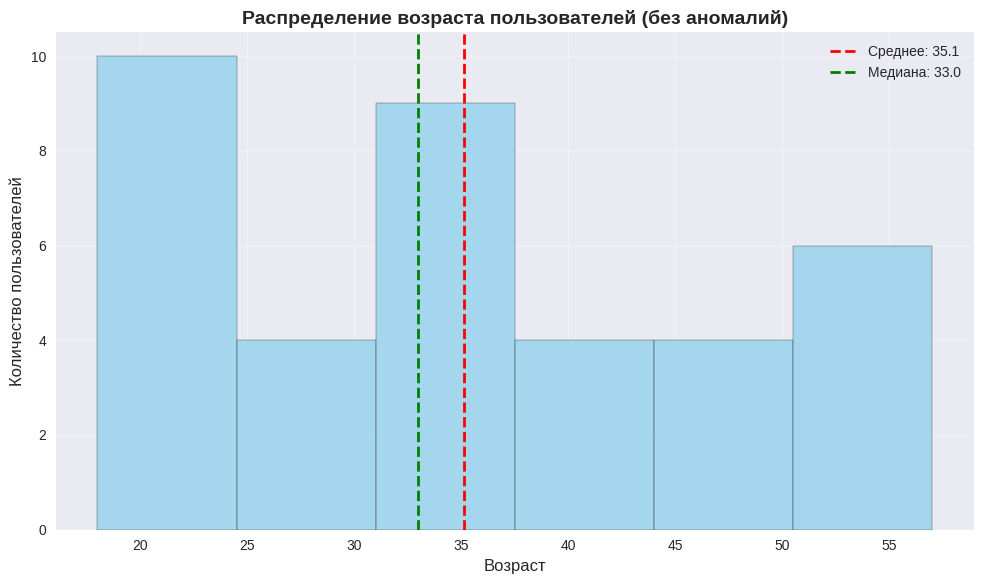

Гистограмма возраста построена


=== Построение боксплота ===


/tmp/ipython-input-1725819302.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot,


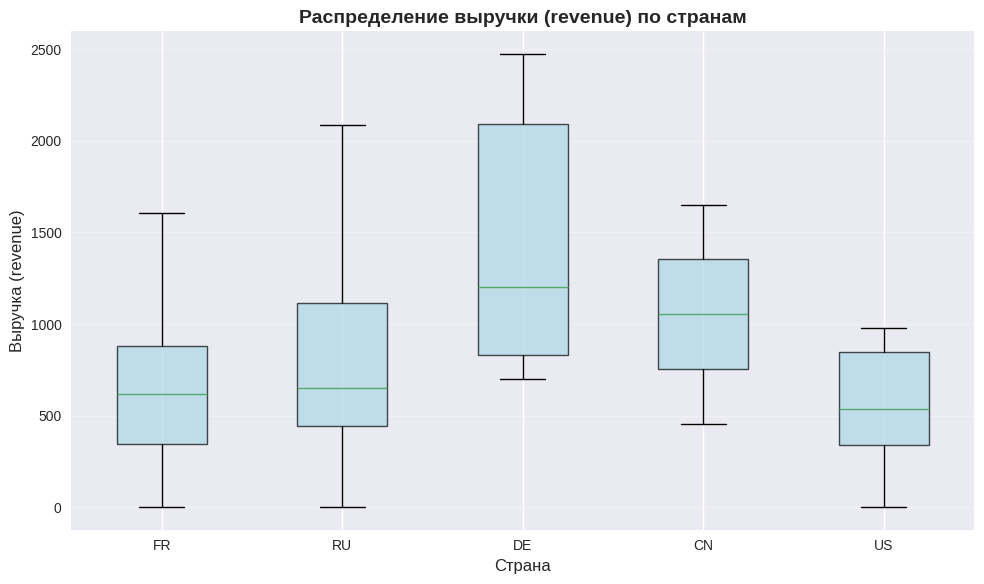

Боксплот выручки по странам построен


=== Построение scatter plot ===


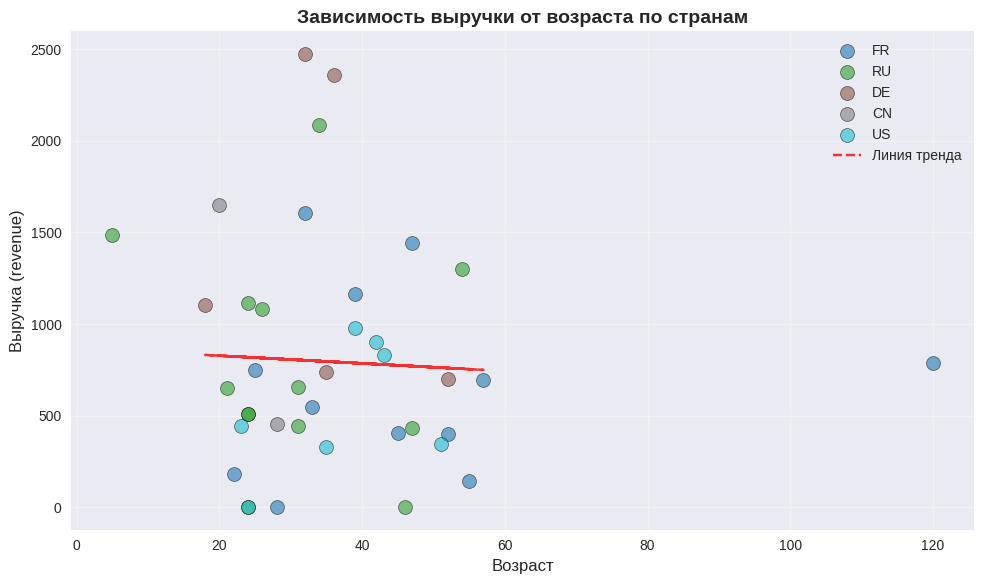

Scatter plot зависимости выручки от возраста построен



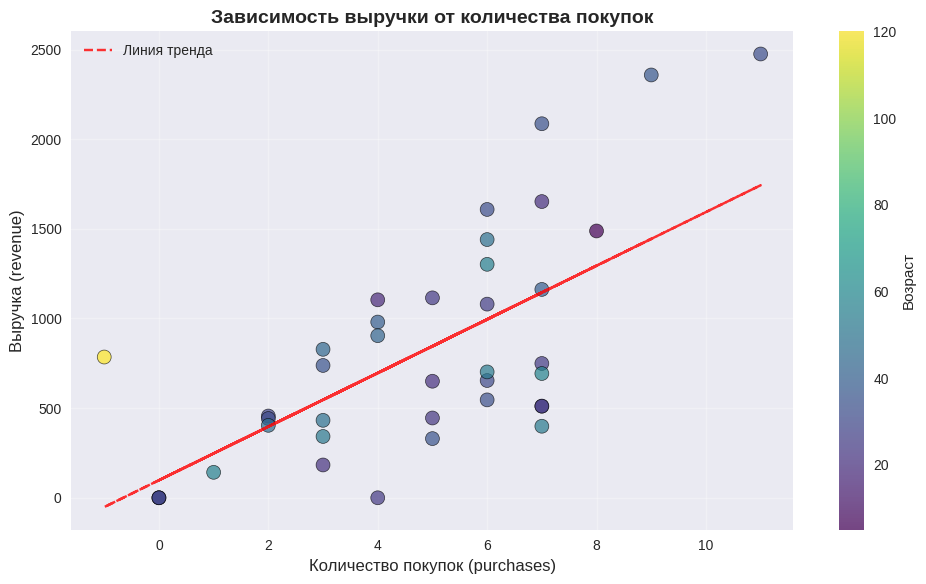

Scatter plot зависимости выручки от покупок построен




In [6]:
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


print("=== Построение гистограммы ===")
plt.figure(figsize=(10, 6))


age_data = df[(df['age'] >= 18) & (df['age'] <= 100)]['age'].dropna()


n = len(age_data)
bins_count = int(1 + 3.322 * np.log10(n)) if n > 0 else 15

plt.hist(age_data,
         bins=bins_count,
         alpha=0.7,
         color='skyblue',
         edgecolor='black')

plt.title('Распределение возраста пользователей (без аномалий)', fontsize=14, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axvline(x=age_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {age_data.mean():.1f}')
plt.axvline(x=age_data.median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: {age_data.median():.1f}')
plt.legend()
plt.tight_layout()
plt.show()
print("Гистограмма возраста построена\n")
print("="*50 + "\n")


print("=== Построение боксплота ===")
plt.figure(figsize=(10, 6))


countries = df['country'].unique()
data_to_plot = []

for country in countries:
    country_data = df[df['country'] == country]['revenue'].dropna()
    data_to_plot.append(country_data)

plt.boxplot(data_to_plot,
           labels=countries,
           vert=True,
           patch_artist=True,
           boxprops=dict(facecolor='lightblue', alpha=0.7))

plt.title('Распределение выручки (revenue) по странам', fontsize=14, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Выручка (revenue)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
print("Боксплот выручки по странам построен\n")
print("="*50 + "\n")


print("=== Построение scatter plot ===")
plt.figure(figsize=(10, 6))


countries = df['country'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))


for i, country in enumerate(countries):
    country_data = df[df['country'] == country]
    plt.scatter(country_data['age'],
               country_data['revenue'],
               alpha=0.6,
               color=colors[i],
               label=country,
               edgecolors='black',
               linewidth=0.5,
               s=100)  # Размер точек

plt.title('Зависимость выручки от возраста по странам', fontsize=14, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Выручка (revenue)', fontsize=12)
plt.legend(title='Страна')
plt.grid(True, alpha=0.3)


trend_data = df[(df['age'] >= 18) & (df['age'] <= 100)]
z = np.polyfit(trend_data['age'], trend_data['revenue'], 1)
p = np.poly1d(z)
plt.plot(trend_data['age'], p(trend_data['age']), "r--", alpha=0.8, label='Линия тренда')

plt.legend()
plt.tight_layout()
plt.show()
print("Scatter plot зависимости выручки от возраста построен\n")


plt.figure(figsize=(10, 6))
plt.scatter(df['purchases'],
           df['revenue'],
           alpha=0.7,
           c=df['age'],
           cmap='viridis',
           edgecolors='black',
           linewidth=0.5,
           s=100)

plt.colorbar(label='Возраст')
plt.title('Зависимость выручки от количества покупок', fontsize=14, fontweight='bold')
plt.xlabel('Количество покупок (purchases)', fontsize=12)
plt.ylabel('Выручка (revenue)', fontsize=12)
plt.grid(True, alpha=0.3)


z = np.polyfit(df['purchases'], df['revenue'], 1)
p = np.poly1d(z)
plt.plot(df['purchases'], p(df['purchases']), "r--", alpha=0.8, label='Линия тренда')

plt.legend()
plt.tight_layout()
plt.show()
print("Scatter plot зависимости выручки от покупок построен\n")
print("="*50 + "\n")